In [100]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)


def generate_data(m=100, n=20, sigma=5, density=0.2):
    np.random.seed(1)
    beta_star = np.random.randn(n)
    idxs = np.random.choice(range(n), int((1-density)*n), replace=False)
    for idx in idxs:
        beta_star[idx] = 0
    X = np.random.randn(m,n)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y, beta_star

m = 100
n = 20
sigma = 5
density = 0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)),[cp.sum(beta) == 1,])

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve(solver=cp.SCS)
    beta_values.append(beta.value)

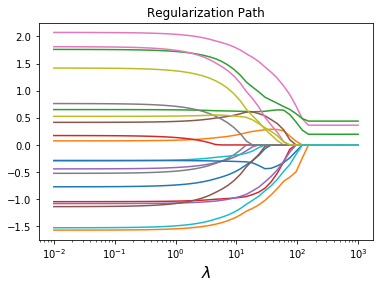

In [101]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)

In [95]:
X_train

array([[ 6.77097876e-02, -1.03890593e+00, -2.63677447e-01,
         5.38250569e-01,  1.52826025e+00,  1.95667685e+00,
         4.78200352e-01,  1.19345210e-01, -8.57465206e-01,
        -7.61947804e-01,  6.39304899e-01,  4.75260532e-02,
         3.11483365e+00, -5.32461593e-01,  3.45583676e-01,
        -4.25514043e-01, -2.23877138e+00,  1.75539696e+00,
        -2.64193363e-01,  8.46294467e-01],
       [ 2.08673250e+00,  5.26478312e-01,  9.83809002e-01,
        -1.92220001e+00, -8.94825229e-01,  3.30062822e-01,
         1.04859100e+00,  1.34989935e+00,  1.24567511e+00,
        -6.91191472e-01,  1.28107338e+00, -7.27064310e-01,
        -7.99168694e-01, -3.54562185e-03,  5.12594636e-01,
        -1.67860864e-01,  1.34633628e+00, -6.15491978e-01,
        -7.43036696e-01,  1.01593613e+00],
       [-5.55155414e-01,  4.36259361e-01, -1.46689715e-01,
         2.34928244e-02, -2.58302186e-01,  1.83915619e+00,
        -1.93989588e-01,  1.57413147e+00,  7.56900469e-01,
        -5.27124266e-01, -7.5

In [96]:
Y_train

array([ -5.84198708,  -8.63905462,   9.25510548,  -0.5477162 ,
         4.93203344,  -2.02167401,   4.61111915,   6.65699236,
        -4.27418002,  -6.77241529,   1.91861748,  -1.51490596,
        -4.77711126,   1.09219582,  -3.39220011,   6.19766383,
         9.43009513,   1.95998243,   0.82114383, -10.62673751,
        -0.47998061,   0.2485529 ,  -8.75312633,  -7.49871654,
        -5.51073082,   1.8489305 ,   6.2230103 ,   3.22526556,
        15.11557317,  -0.13533834,   3.91604239,   8.2876337 ,
        -0.12237509,  -2.42399042,  -0.10188535,   5.85376501,
        -4.94392309,   8.02621511,  -1.55159827,   0.50264164,
         5.67612039,   9.4001496 ,   3.54340266,   0.93929026,
       -14.43254126,  -0.06632088,  -3.97558129,   3.52872655,
        -9.71259254,  -3.61175462])

0.9999913865357166